## Assignment Module 8 Lab 1: Predicting House Prices in California using Linear Regression

### Background

Accurately predicting house prices is essential in the real estate market. In this assignment, you will use linear regression to predict house prices based on various features such as the number of rooms, population density, and median income in different neighborhoods in California.

### Dataset

The dataset you will be using is the California Housing dataset, which contains information about houses in different locations in California. The dataset includes 20,640 observations and 8 variables, including:

- `MedInc`: Median income in the block
- `HouseAge`: Median house age in the block
- `AveRooms`: Average number of rooms per dwelling
- `AveBedrms`: Average number of bedrooms per dwelling
- `Population`: Block population
- `AveOccup`: Average house occupancy
- `Latitude`: Latitude coordinate of the block
- `Longitude`: Longitude coordinate of the block

You can load the dataset using the following code:

```python
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california = fetch_california_housing(as_frame=True)

# Access the data and target variables
X = california.data
y = california.target
```

### Task

Your task is to predict house prices in California using linear regression. You will need to perform the following steps:

1. Load the California Housing dataset into a Pandas DataFrame.
2. Split the dataset into training and testing sets, with a 70/30 split.
3. Fit a `LinearRegression` model to the training data.
4. Predict house prices for the testing set.
5. Evaluate the performance of the model using the following error checking metrics:
   - R-squared (R2)
   - Mean Squared Error (MSE)
   - Mean Absolute Error (MAE)
   - Akaike Information Criterion (AIC)
6. Analyze the performance of the model and provide recommendations for improvement.

You can use the `OLS` (ordinary least squares) method from the `statsmodels.regression.linear_model` module to calculate the Akaike Information Criterion (AIC).

### Submission Instructions

Please submit a Jupyter notebook containing your code, output, and analysis. Make sure to include the following sections in your notebook:

1. Introduction
2. Dataset Description
3. Data Preprocessing
4. Model Training
5. Model Evaluation
6. Performance Analysis and Recommendations
7. Conclusion

Your notebook should be well-documented and easy to follow, with clear explanations of the steps you took and the results you obtained. Make sure to comment your code and include markdown cells explaining your thought process and conclusions. 

# **Introduction**

Advocates of environmental justice argue that low income housing is disproportionately located in areas more susceptible to natural disasters, and therefore, people who live in low-income communities are more vulnerable to natural disasters and other climate change threats. And because of this, low-income communities are exposed to multiple environmental hazards that further depresses their home value. 

In this assignment, I will use linear regression to predict home prices in different neighborhoods in California, to help with the efforts of environmental justice advocates prove that neighborhoods in the wildfire corridor, the LA air/smog basin, and Central Valley areas have lower home values.

Hypothesis Statement

*Low-income California neighborhoods are systematically situated in environmental hazard zones, and this compounded disadvantage further suppresses their housing values beyond what is explained by conventional predictors.*

# **Dataset Description**

This dataset is the California Housing dataset, which contains information about houses in different locations in California. The dataset includes 20,640 observations and 8 variables, including:

MedInc: Median income in the block

HouseAge: Median house age in the block

AveRooms: Average number of rooms per dwelling

AveBedrms: Average number of bedrooms per dwelling

Population: Block population

AveOccup: Average house occupancy

Latitude: Latitude coordinate of the block

Longitude: Longitude coordinate of the block

In [11]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# **Data Preprocessing**

**Load the California Housing dataset into a DataFrame**

In [14]:
california = fetch_california_housing(as_frame=True)
df = california.frame

**Define predictors (X) and response (y)**

In [61]:
X = df[california.feature_names] # These baseline predictors establish how much traditional factors explain house price before testing hazard effects.
y = df['MedHouseVal']# Defining y allows us to measure how well our model predicts actual prices.

**Split the data into training and testing sets (70% train, 30% test)**

*I need to train on 70% of data and test on the remaining 30%. This ensures my baseline performance metrics are reliable*

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

# **Model Training**

**Fit a linear regression model on the training data**

*I need to create my “straight‐line” model and then I want the model to “learn” how features relate to home price.*

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

*This fit defines the baseline relationship I will need to compare against when adding environmental indicators to prove my hypothesis*

**Predict house values on the testing set.**

*I want to Computes predicted targets using the fitted model and get price estimates for neighborhoods the model hasn’t seen*

In [28]:
y_pred = model.predict(X_test)

# **Model Evaluation**

**Compute standard regression metrics on the test set**

In [77]:
r2  = r2_score(y_test, y_pred) #  R² shows what percent of price variation my baseline features capture
mse = mean_squared_error(y_test, y_pred) # MSE measures the squared size of my prediction errors
mae = mean_absolute_error(y_test, y_pred) # MAE tells me the average error magnitude

**Calculate AIC using statsmodels OLS for model selection comparison**

In [34]:
X_train_sm = sm.add_constant(X_train) #Adds an intercept column for OLS
ols = sm.OLS(y_train, X_train_sm).fit() # Baseline AIC will indicate if future additions actually improve trade-off between fit and complexity
aic = ols.aic # AIC balances fit vs. model size

In [36]:
print("Model Performance Evaluation:")
print(f"  R-squared: {r2:.4f}")
print(f"  MSE:       {mse:.4f}")
print(f"  MAE:       {mae:.4f}")
print(f"  AIC:       {aic:.2f}")

Model Performance Evaluation:
  R-squared: 0.5958
  MSE:       0.5306
  MAE:       0.5272
  AIC:       31664.71


In [ ]:
*The model performance eval establishes our baseline metrics and summarizes accuracy*

**Scatter Plot of Actual vs. Predicted Home Prices**

In [40]:
import matplotlib.pyplot as plt

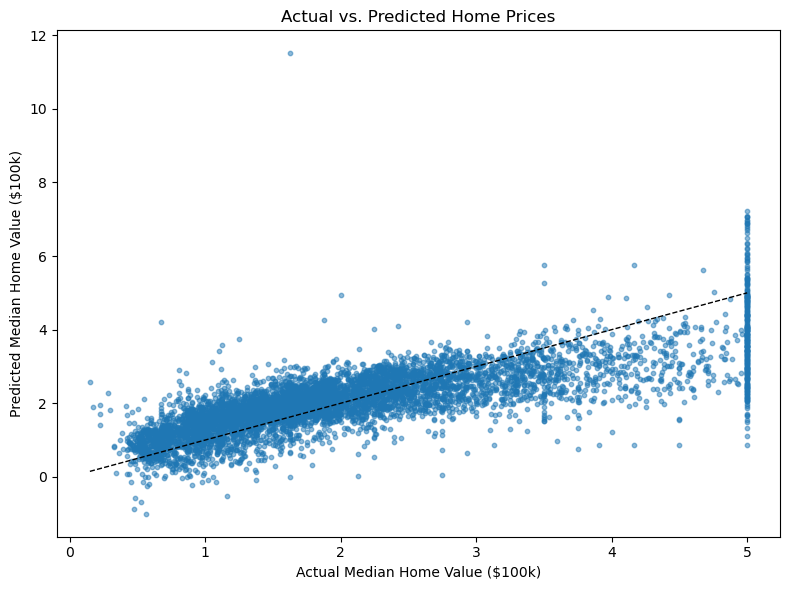

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=10, alpha=0.5)
min_val, max_val = y_test.min(), y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], '--k', linewidth=1)
plt.xlabel('Actual Median Home Value ($100k)')
plt.ylabel('Predicted Median Home Value ($100k)')
plt.title('Actual vs. Predicted Home Prices')
plt.tight_layout()
plt.show()

# **Performance Analysis and Recommendations**

The performance analysis of my benchmark model highlights how each metric plays a key role in providing evidence for my hypothesis. The R-squared value shows how much of the variation in house prices is explained by the features. This gives an idea about how much room remains for envirnmental hazard exposure to account for. 

The MSE and MAE tell me how large my usual prediction mistakes are, so I can try to understand if the remaining unexplained variation might be systematically tied to the effects of the Zones at risk of environmental hazards. 

The AIC balances model accuracy against complexity, ensuring that when I add hazard indicators, I'll actually improve my ability to capyure real value penalties instead of just loading on extra variables.

One of the major recommendations is to incorporate environmental hazard indicators to imporve the model.

# **Conclusion**

This linear regression analysis functions as a benchmark to explain a portion of home value variability. Together, each performance metric establishes a clear and quantitative baseline for demonstrating that low-income, high-risk neighborhoods suffer a measurable depression on the value of their homes.